# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: QQ plots
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

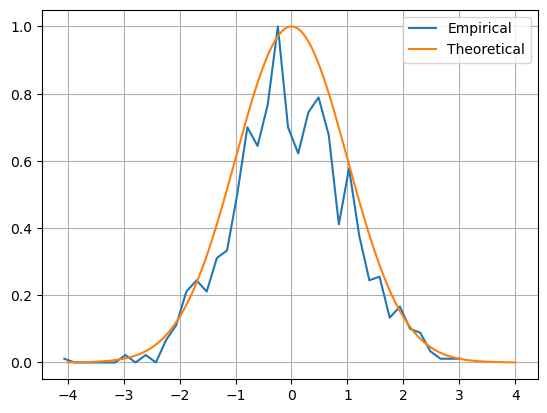

In [2]:
## generate data

n = 1000
rng = np.random.default_rng()
data = rng.standard_normal(n)
# data = np.exp(rng.standard_normal(n)*0.8) # log-norm distribution

# theoretical normal distribution given N
x = np.linspace(-4, 4, 10001)
theonorm = stats.norm.pdf(x)
theonorm = theonorm/np.max(theonorm)

# plot histograms on top of each other
yy,xx = np.histogram(data, 40)
yy = yy/np.max(yy)
xx = (xx[:-1] + xx[1:])/2

plt.plot(xx, yy, label='Empirical')
plt.plot(x, theonorm, label='Theoretical')
plt.legend()
plt.grid()
plt.show()

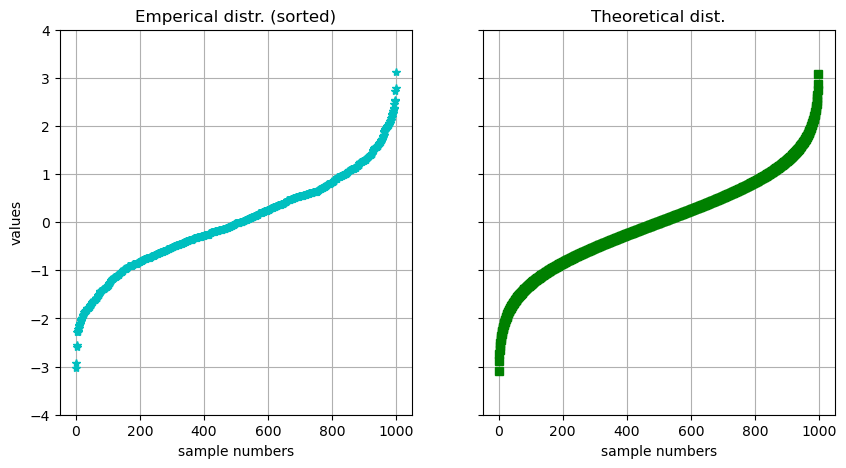

In [3]:
sort_zdata  = np.sort(stats.zscore(data))  # zscore normalization -> mean=0, std=1
# zscore is not necessary in this case, becase data - are n-samples from normal distr.
# with mu=0 and std=1

sort_normal = stats.norm.ppf(np.linspace(0, 1, n))  # [0,1] - prob. range, n - number of samples
# The inverse cumulative distribution function (inverse CDF or ppf, percent point function) takes
# a probability value as input and returns a corresponding value from the distribution as output.
# cdf - integral of pdf

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4)

#ax[0].axis('equal')
ax[0].plot(sort_zdata, '*c')
ax[0].set(ylim=[-4, 4], title='Emperical distr. (sorted)', ylabel='values',
          xlabel='sample numbers')
ax[0].grid()

#ax[1].axis('equal')
ax[1].plot(sort_normal, 'sg',)
ax[1].set(ylim=[-4, 4], title='Theoretical dist.', xlabel='sample numbers')
ax[1].grid();

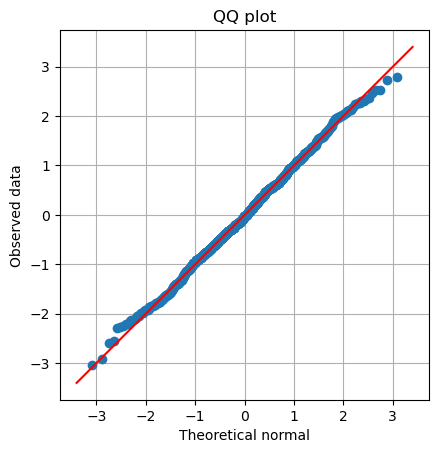

In [6]:
## create a QQ plot
# Так или иначе, идея этого графика в том, что мы сравниваем
# значение теоретического Гауссого распределения и эмпирического распределения.
# Если точки на графике выстраиваются в ряд, распределения совпадают. 

# QQ plot is theory vs reality
plt.plot(sort_normal, sort_zdata, 'o')

# let's define the limits of this plot
# These two lines give us x- and y-axis limits based on the above plt.plot()
xL, xR = plt.xlim()
yL, yR = plt.ylim()
# We want our plot to be "square" for the readibility;
# to make sure that both sort_normal and sort_zdata are wholly and correctly plotted
# limits must be define as
              # lower boundary            upper boundary
limits  = [np.min([xL, xR, yL, yR]), np.max([xL, xR, yL, yR])]
# Now, set found axes limits
plt.xlim(limits)
plt.ylim(limits)

# draw red comparison line
plt.plot(limits, limits, color='red', linewidth=1.5)
plt.xlabel('Theoretical normal')
plt.ylabel('Observed data')
plt.title('QQ plot')
plt.axis('square')
plt.grid()
plt.show();

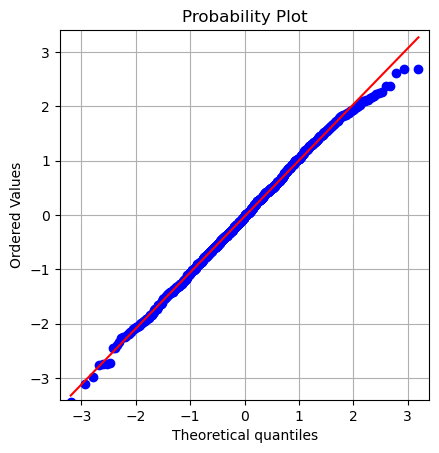

In [47]:
## Python solution
fig, ax = plt.subplots()
x = stats.probplot(data, plot=ax)
ax.set(aspect='equal', xlim=limits, ylim=limits)
ax.grid()
plt.show()